# Pandas DataFrame

In [2]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
1.21.5
1.4.2


In [2]:
# rectangular table of data

In [8]:
grades1 = pd.Series([88,78,92,56,79,92])
grades2 = pd.Series([84,81,58, 84,90,78])

grades1.index = pd.Index(["Ben", "May", "Sue", "Blake", "Amy", "Steve"], name = 'student')
grades2.index = grades1.index

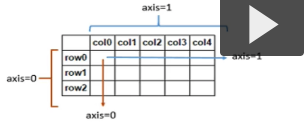

### pandas indices are immutable 
    it is safe for more than one series to share an index

In [9]:
grades2

student
Ben      84
May      81
Sue      58
Blake    84
Amy      90
Steve    78
dtype: int64

___


In [5]:
# create a dataframe

In [10]:
gradebook = pd.DataFrame([grades1, grades2])
gradebook

student,Ben,May,Sue,Blake,Amy,Steve
0,88,78,92,56,79,92
1,84,81,58,84,90,78


In [9]:
# the students are not aligned

In [10]:
# we need to transpose

In [11]:
gradebook = pd.DataFrame([grades1, grades2]).T
gradebook

,0,1
student,,
Ben,88,84
May,78,81
Sue,92,58
Blake,56,84
Amy,79,90
Steve,92,78


In [12]:
# the index is student

In [13]:
# our variables do not hav a nice name

#### option 1 is to go back and update the original series

In [16]:
# grades1 = pd.Series([88,78,92,56,79,92], name = 'midterm')
# grades2 = pd.Series([84,81,58, 84,90,78], name = 'final')

---

## alternate

In [12]:
gradebook.columns = ['Mid-term', 'Final']

In [13]:
gradebook

,Mid-term,Final
student,,
Ben,88,84
May,78,81
Sue,92,58
Blake,56,84
Amy,79,90
Steve,92,78


---

## a common practice is to pass a dictionary into a dataframe

In [14]:
gradebook = pd.DataFrame({'midterm':grades1, 'final': grades2})

In [15]:
gradebook

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,58
Blake,56,84
Amy,79,90
Steve,92,78


In [25]:
# no need to TRANSPOSE

In [26]:
# reshuffle the indexes after the fact

In [16]:
gradebook = pd.DataFrame({'midterm':grades1, 'final': grades2}, columns = ['final', 'midterm'])
gradebook

,final,midterm
student,,
Ben,84,88
May,81,78
Sue,58,92
Blake,84,56
Amy,90,79
Steve,78,92


In [18]:
gradebook = pd.DataFrame({'midterm':grades1, 'final': grades2}, columns = ['midterm', 'final'])
gradebook

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,58
Blake,56,84
Amy,79,90
Steve,92,78


In [19]:
grades3 = pd.Series([88,78,92,56,79,92])
grades4 = pd.Series([84,81,58, 84,90,78])

grades3.index = pd.Index(["Ben", "May", "Sue", "Blake", "Amy", "Steve"], name = 'student')
grades4.index = grades3.index

grades3

student
Ben      88
May      78
Sue      92
Blake    56
Amy      79
Steve    92
dtype: int64

In [20]:
grades4

student
Ben      84
May      81
Sue      58
Blake    84
Amy      90
Steve    78
dtype: int64

In [5]:
grades3.index
grades4.index

Index(['Ben', 'May', 'Sue', 'Blake', 'Amy', 'Steve'], dtype='object', name='student')

In [21]:
gradebook4 = pd.DataFrame({'midterm4':grades3, 'final4': grades4}, columns = ['midterm4', 'final4'])

In [22]:
gradebook4

,midterm4,final4
student,,
Ben,88,84
May,78,81
Sue,92,58
Blake,56,84
Amy,79,90
Steve,92,78


---

In [23]:
# reduce number or rows

In [24]:
gradebook.head()

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,58
Blake,56,84
Amy,79,90


In [25]:
# we only lost 1 row

In [26]:
gradebook.head(3)

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,58


---

## How do we get teh columns back from the dataframe

In [27]:
# use dictionary notation

In [28]:
gradebook['midterm']

student
Ben      88
May      78
Sue      92
Blake    56
Amy      79
Steve    92
Name: midterm, dtype: int64

In [29]:
# we got this as a series

In [30]:
type(gradebook['midterm'])

pandas.core.series.Series

---

In [31]:
# soemthing earlier can be done

In [32]:
# variable name has no spaces or special characters

In [33]:
gradebook.midterm

student
Ben      88
May      78
Sue      92
Blake    56
Amy      79
Steve    92
Name: midterm, dtype: int64

In [34]:
# this would not work iwth spaces etc

In [35]:
gradebook.midterm

student
Ben      88
May      78
Sue      92
Blake    56
Amy      79
Steve    92
Name: midterm, dtype: int64

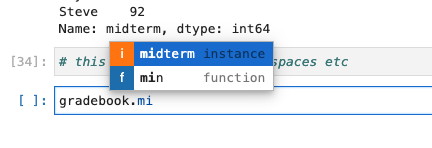

## How do we pull out ROWS from a datatable

In [38]:
gradebook['Ben']

KeyError: 'Ben'

In [ ]:
# this DOES NOT WORK -- DICTIONARY STLE NOTATION WILL NOT WORK

## LOC notation

In [39]:
gradebook.loc['Ben']

midterm    88
final      84
Name: Ben, dtype: int64

---

# Changing values

In [42]:
gradebook.final = gradebook.final + 5

In [43]:
gradebook

,midterm,final
student,,
Ben,88,90
May,78,87
Sue,92,64
Blake,56,90
Amy,79,96
Steve,92,84


___

## Add new columns

In [44]:
gradebook['homework'] = [50]*6

In [45]:
gradebook

,midterm,final,homework
student,,,
Ben,88,90,50
May,78,87,50
Sue,92,64,50
Blake,56,90,50
Amy,79,96,50
Steve,92,84,50


## Deleting the variable

In [46]:
del gradebook['homework']

In [47]:
gradebook

,midterm,final
student,,
Ben,88,90
May,78,87
Sue,92,64
Blake,56,90
Amy,79,96
Steve,92,84


In [48]:
# ANOTHER WAY TO DO THIS WITHOUT USING DEL

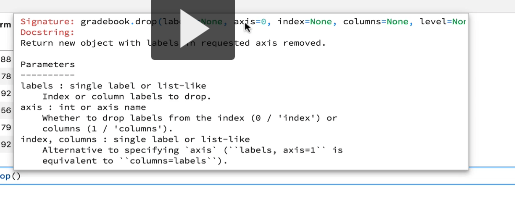

In [49]:
# DROP WORKS ON BOTH ROWS AND COLUMNS

# AXIS IS IMPORTANT

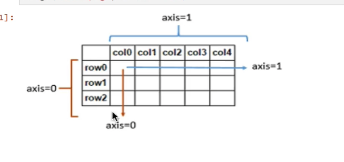

## aixs = 0 --> along the rows

## axis = 1 --> along the columns

In [ ]:
# to remove final variable

In [50]:
gradebook.drop('final', axis=1)

,midterm
student,
Ben,88
May,78
Sue,92
Blake,56
Amy,79
Steve,92


## this does not change the original dataframe

## this is NOT in PLACE

In [52]:
gradebook

,midterm,final
student,,
Ben,88,90
May,78,87
Sue,92,64
Blake,56,90
Amy,79,96
Steve,92,84


---

In [53]:
gradebook.drop('Ben', axis = 0)

,midterm,final
student,,
May,78,87
Sue,92,64
Blake,56,90
Amy,79,96
Steve,92,84


---

## integration with matplotlib

Text(0.5, 1.0, 'Midterm and Final Grades')

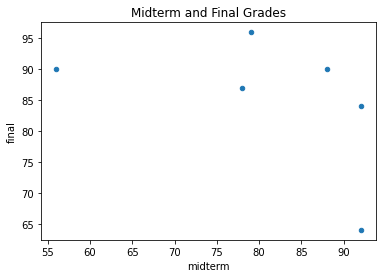

In [55]:
gradebook.plot.scatter(x='midterm', y = 'final')
plt.title("Midterm and Final Grades")

---

# Save

In [56]:
gradebook.to_csv("gradebook.csv")